In [2]:
!pip install pandas-profiling==2.8.0
import pandas_profiling
from pandas_profiling import ProfileReport

     |████████████████████████████████| 259 kB 5.3 MB/s 
     |████████████████████████████████| 4.7 MB 40.7 MB/s 
     |████████████████████████████████| 675 kB 30.6 MB/s 
     |████████████████████████████████| 59 kB 5.4 MB/s 
     |████████████████████████████████| 812 kB 66.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ad1c8f9599a5c417caa1b0a937deff898f99f40a1ffd49950c28160c58c5ffcb
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=04e52115cab4f6f0b6acb51e3e581d7d16c1c5e9df9b65308dbb2d5dee707244
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [3]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/Trabajo de título/TT2/Analisis de datos'

Mounted at /content/drive/


In [5]:
#respuesta_x = pd.read_csv(path + '/Dataset_oficial_si_respondidas.csv', sep=";") # Respuestas en dataset construido
x = pd.read_csv(path + '/Dataset_oficial_VF6.csv', sep=";") # Dataset completo
x

,Envío_Id,E_mail,Sexo,Edad,Segmento,SubSegmento,Segto_Agrup,Carterizado,Apertura,Hora_envio,Dia_envio,Dia_semana,Mes_envio,Fecha,Fecha_Termino,Fecha_R,Duracion,Duracion_i_f,RESPONDIDA
0,1,1,H,20,E,E4,E1S,0,0,9,5,Domingo,1,2020-01-05,2020-05-28,2020-05-28,144,144,0
1,2,1,H,20,E,E4,E1S,0,3,16,28,Jueves,5,2020-05-28,2020-12-20,2020-05-28,0,206,1
2,3,1,H,21,E,E4,E1S,0,0,15,20,Domingo,12,2020-12-20,2021-01-01,2020-05-28,12,12,0
3,4,2,M,32,E,E2B,E2S,1,0,9,6,Lunes,1,2020-01-06,2020-02-15,S.F,40,40,0
4,5,2,M,32,E,E2B,E2S,1,0,19,15,Sabado,2,2020-02-15,2020-07-06,S.F,142,142,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593601,4593602,911369,H,51,D,D2A,C1S,1,0,20,7,Lunes,12,2020-12-07,2021-01-01,S.F,25,25,0
4593602,4593603,911370,M,45,E,A1A,E1S,0,2,18,8,Sabado,2,2020-02-08,2021-01-01,S.F,328,328,0
4593603,4593604,911371,H,52,D,D2A,C1S,1,3,10,20,Jueves,2,2020-02-20,2020-07-04,2020-02-24,4,135,1
4593604,4593605,911371,H,52,D,D2A,C1S,1,0,13,4,Sabado,7,2020-07-04,2020-08-12,2020-03-26,39,39,0


In [6]:
x = x.drop(['Envío_Id', 'Fecha', 'Fecha_Termino', 'Fecha_R', 'E_mail', 'Dia_envio'], axis=1)
x

,Sexo,Edad,Segmento,SubSegmento,Segto_Agrup,Carterizado,Apertura,Hora_envio,Dia_semana,Mes_envio,Duracion,Duracion_i_f,RESPONDIDA
0,H,20,E,E4,E1S,0,0,9,Domingo,1,144,144,0
1,H,20,E,E4,E1S,0,3,16,Jueves,5,0,206,1
2,H,21,E,E4,E1S,0,0,15,Domingo,12,12,12,0
3,M,32,E,E2B,E2S,1,0,9,Lunes,1,40,40,0
4,M,32,E,E2B,E2S,1,0,19,Sabado,2,142,142,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593601,H,51,D,D2A,C1S,1,0,20,Lunes,12,25,25,0
4593602,M,45,E,A1A,E1S,0,2,18,Sabado,2,328,328,0
4593603,H,52,D,D2A,C1S,1,3,10,Jueves,2,4,135,1
4593604,H,52,D,D2A,C1S,1,0,13,Sabado,7,39,39,0


#Comparación de respuestas reales vs procesadas
Dado que en la entrega no se ha incluido la BD cliente que se utilizó, las respuestas reales se podrán visualizar en el informe del capítulo "Comprensión de los datos".

In [ ]:
respuesta_x

In [ ]:
respuesta_x[respuesta_x['Duracion']==0].shape

In [ ]:
respuesta_x[respuesta_x['Duracion']>=40].shape

In [ ]:
respuesta_x[(respuesta_x['Duracion']>=30)&(respuesta_x['Duracion']<40)].shape

In [ ]:
len(respuesta_x['E_mail'].unique())

In [ ]:
freq = respuesta_x['Mes_respuesta'].value_counts() 
print(freq) # Dataset construido

# Estadistica descriptiva, usando profiling

In [ ]:
x

In [ ]:
# Comodin

freq = x['Segmento'].value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

In [ ]:
# Comodin

freq = x['SubSegmento'].value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

In [ ]:
# Comodin

freq = x['Segto_Agrup'].value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

In [ ]:
# Comodin

freq = x[(x['RESPONDIDA']==0)&(x['Mes_envio']==1)].SubSegmento.value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

In [ ]:
# Comodin

freq = x['Hora_envio'].value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

In [ ]:
# Comodin

freq = x[x['RESPONDIDA']==0].Mes_envio.value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

In [ ]:
# Comodin

freq = x['Mes_envio'].value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

In [ ]:
# Comodin

freq = x['Dia_envio'].value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido


In [ ]:
x["Apertura"].sum()

## Año 2020 Completo

### Completo

In [ ]:
profile = ProfileReport(x, title="Dataset completo 2020", explorative=True)
profile.to_file(path + '/Profiling pandas/2020_completo.html')

In [ ]:
plt.boxplot(x['Duracion'])
plt.show()

In [ ]:
plt.boxplot(x['Edad'])
plt.show()

In [ ]:
plt.boxplot(x['Duracion_i_f'])
plt.show()

### Con respuesta

In [ ]:
si = x[x["RESPONDIDA"]==1]
profileSendi2020_si = ProfileReport(si, title="Dataset completo 2020 - Con respuesta", explorative=True)
profileSendi2020_si.to_file(path + '/Profiling pandas/2020_con_respuesta.html')

In [ ]:
# Duracion de cuanto se demoro en responder
plt.boxplot(x[x.RESPONDIDA==1].Duracion)
plt.show()

In [ ]:
plt.boxplot(x[x.RESPONDIDA==1].Duracion_i_f)
plt.show()

###Sin respuesta

In [ ]:
no = x[x["RESPONDIDA"]==0]
profileSendi2020_no = ProfileReport(no, title="Dataset completo 2020 - Sin respuesta", explorative=True)
profileSendi2020_no.to_file(path + '/Profiling pandas/2020_sin_respuesta.html')

In [ ]:
plt.boxplot(x[x.RESPONDIDA==0].Duracion)
plt.show()

In [ ]:
plt.boxplot(x[x.RESPONDIDA==0].Duracion_i_f)
plt.show()

##Enero

In [ ]:
enero = x[x.Mes_envio == 1]
enero.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_1 = ProfileReport(enero, title="Dataset Enero 2020 - Completo", explorative=True)
profileSendi2020_1.to_file(path + '/Profiling pandas/1_enero_completo.html')

### Con respuesta

In [ ]:
si_ene = enero[enero["RESPONDIDA"]==1]
profileSendi2020_1_si = ProfileReport(si_ene, title="Dataset Enero 2020 - con respuesta", explorative=True)
profileSendi2020_1_si.to_file(path + '/Profiling pandas/1_enero_con_respuesta.html')

### Sin respuesta

In [ ]:
no_ene = enero[enero["RESPONDIDA"]==0]
profileSendi2020_1_no = ProfileReport(no_ene, title="Dataset Enero 2020 - sin respuesta", explorative=True)
profileSendi2020_1_no.to_file(path + '/Profiling pandas/1_enero_sin_respuesta.html')

##Febrero

In [ ]:
febrero = x[x.Mes_envio == 2]
febrero.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_2 = ProfileReport(febrero, title="Dataset febrero 2020 - Completo", explorative=True)
profileSendi2020_2.to_file(path + '/Profiling pandas/2_febrero_completo.html')

###Con respuesta

In [ ]:
si_feb = febrero[febrero["RESPONDIDA"]==1]
profileSendi2020_2_si = ProfileReport(si_feb, title="Dataset Febrero 2020 - con respuesta", explorative=True)
profileSendi2020_2_si.to_file(path + '/Profiling pandas/2_febrero_con_respuesta.html')

### Sin respuesta

In [ ]:
no_feb = febrero[febrero["RESPONDIDA"]==0]
profileSendi2020_2_no = ProfileReport(no_feb, title="Dataset Febrero 2020 - sin respuesta", explorative=True)
profileSendi2020_2_no.to_file(path + '/Profiling pandas/2_febrero_sin_respuesta.html')

## Marzo

In [ ]:
marzo = x[x.Mes_envio == 3]
marzo.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_3 = ProfileReport(marzo, title="Dataset marzo 2020 - Completo", explorative=True)
profileSendi2020_3.to_file(path + '/Profiling pandas/3_marzo_completo.html')

###Con respuesta

In [ ]:
si_mar = marzo[marzo["RESPONDIDA"]==1]
profileSendi2020_3_si = ProfileReport(si_mar, title="Dataset Marzo 2020 - con respuesta", explorative=True)
profileSendi2020_3_si.to_file(path + '/Profiling pandas/3_marzo_con_respuesta.html')

###Sin respuesta

In [ ]:
no_mar = marzo[marzo["RESPONDIDA"]==0]
profileSendi2020_3_no = ProfileReport(no_mar, title="Dataset Marzo 2020 - sin respuesta", explorative=True)
profileSendi2020_3_no.to_file(path + '/Profiling pandas/3_marzo_sin_respuesta.html')

##Abril

In [ ]:
abril = x[x.Mes_envio == 4]
abril.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_4 = ProfileReport(abril, title="Dataset Abril 2020 - completo", explorative=True)
profileSendi2020_4.to_file(path + '/Profiling pandas/4_abril_completo.html')

### Con respuesta

In [ ]:
si_abr = abril[abril["RESPONDIDA"]==1]
profileSendi2020_4_si = ProfileReport(si_abr, title="Dataset Abril 2020 - con respuesta", explorative=True)
profileSendi2020_4_si.to_file(path + '/Profiling pandas/4_abril_con_respuesta.html')

###Sin respuesta

In [ ]:
no_abr = abril[abril["RESPONDIDA"]==0]
profileSendi2020_4_no = ProfileReport(no_abr, title="Dataset Abril 2020 - sin respuesta", explorative=True)
profileSendi2020_4_no.to_file(path + '/Profiling pandas/4_abril_sin_respuesta.html')

##Mayo

In [ ]:
mayo = x[x.Mes_envio == 5]
mayo.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_5 = ProfileReport(mayo, title="Dataset Mayo 2020 - Completo", explorative=True)
profileSendi2020_5.to_file(path + '/Profiling pandas/5_mayo_completo.html')

###Con respuesta

In [ ]:
si_may = mayo[mayo["RESPONDIDA"]==1]
profileSendi2020_5_si = ProfileReport(si_may, title="Dataset Mayo 2020 - con respuesta", explorative=True)
profileSendi2020_5_si.to_file(path + '/Profiling pandas/5_mayo_con_respuesta.html')

###Sin respuesta

In [ ]:
no_may = mayo[mayo["RESPONDIDA"]==0]
profileSendi2020_5_no = ProfileReport(no_may, title="Dataset Mayo 2020 - con respuesta", explorative=True)
profileSendi2020_5_no.to_file(path + '/Profiling pandas/5_mayo_sin_respuesta.html')

##Junio

In [ ]:
junio = x[x.Mes_envio == 6]
junio.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_6 = ProfileReport(junio, title="Dataset Junio 2020 - Completo", explorative=True)
profileSendi2020_6.to_file(path + '/Profiling pandas/6_junio_completo.html')

###Con respuesta

In [ ]:
si_jun = junio[junio["RESPONDIDA"]==1]
profileSendi2020_6_si = ProfileReport(si_jun, title="Dataset Junio 2020 - con respuesta", explorative=True)
profileSendi2020_6_si.to_file(path + '/Profiling pandas/6_junio_con_respuesta.html')

###Sin respuesta

In [ ]:
no_jun = junio[junio["RESPONDIDA"]==0]
profileSendi2020_6_no = ProfileReport(no_jun, title="Dataset Junio 2020 - sin respuesta", explorative=True)
profileSendi2020_6_no.to_file(path + '/Profiling pandas/6_junio_sin_respuesta.html')

##Julio

In [ ]:
julio = x[x.Mes_envio == 7]
julio.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_7 = ProfileReport(julio, title="Dataset Julio 2020 - Completo", explorative=True)
profileSendi2020_7.to_file(path + '/Profiling pandas/7_julio_completo.html')

###Con respuesta

In [ ]:
si_jul = julio[julio["RESPONDIDA"]==1]
profileSendi2020_7_si = ProfileReport(si_jul, title="Dataset Julio 2020 - con respuesta", explorative=True)
profileSendi2020_7_si.to_file(path + '/Profiling pandas/7_julio_con_respuesta.html')

###Sin respuesta

In [ ]:
no_jul = julio[julio["RESPONDIDA"]==0]
profileSendi2020_7_no = ProfileReport(no_jul, title="Dataset Julio 2020 - sin respuesta", explorative=True)
profileSendi2020_7_no.to_file(path + '/Profiling pandas/7_julio_sin_respuesta.html')

##Agosto

In [ ]:
agosto = x[x.Mes_envio == 8]
agosto.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_8 = ProfileReport(agosto, title="Dataset Agosto 2020 - completo", explorative=True)
profileSendi2020_8.to_file(path + '/Profiling pandas/8_agosto_completo.html')

###Con respuesta

In [ ]:
si_ago = agosto[agosto["RESPONDIDA"]==1]
profileSendi2020_8_si = ProfileReport(si_ago, title="Dataset Agosto 2020 - con respuesta", explorative=True)
profileSendi2020_8_si.to_file(path + '/Profiling pandas/8_agosto_con_respuesta.html')

###Sin respuesta

In [ ]:
no_ago = agosto[agosto["RESPONDIDA"]==0]
profileSendi2020_8_no = ProfileReport(no_ago, title="Dataset Agosto 2020 - sin respuesta", explorative=True)
profileSendi2020_8_no.to_file(path + '/Profiling pandas/8_agosto_sin_respuesta.html')

##Septiembre

In [ ]:
septiembre = x[x.Mes_envio == 9]
septiembre.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_9 = ProfileReport(septiembre, title="Dataset Septiembre 2020 - completo", explorative=True)
profileSendi2020_9.to_file(path + '/Profiling pandas/9_septiembre_completo.html')

###Con respuesta

In [ ]:
si_sep = septiembre[septiembre["RESPONDIDA"]==1]
profileSendi2020_9_si = ProfileReport(si_sep, title="Dataset Septiembre 2020 - con respuesta", explorative=True)
profileSendi2020_9_si.to_file(path + '/Profiling pandas/9_septiembre_con_respuesta.html')

###Sin respuesta

In [ ]:
no_sep = septiembre[septiembre["RESPONDIDA"]==0]
profileSendi2020_9_no = ProfileReport(no_sep, title="Dataset Septiembre 2020 - sin respuesta", explorative=True)
profileSendi2020_9_no.to_file(path + '/Profiling pandas/9_septiembre_sin_respuesta.html')

##Octubre

In [ ]:
octubre = x[x.Mes_envio == 10]
octubre.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_10 = ProfileReport(octubre, title="Dataset octubre 2020 - completo", explorative=True)
profileSendi2020_10.to_file(path + '/Profiling pandas/10_octubre_completo.html')

###Con respuesta

In [ ]:
si_oct = octubre[octubre["RESPONDIDA"]==1]
profileSendi2020_10_si = ProfileReport(si_oct, title="Dataset octubre 2020 - con respuesta", explorative=True)
profileSendi2020_10_si.to_file(path + '/Profiling pandas/10_octubre_con_respuesta.html')

###Sin respuesta

In [ ]:
no_oct = octubre[octubre["RESPONDIDA"]==0]
profileSendi2020_10_no = ProfileReport(no_oct, title="Dataset octubre 2020 - sin respuesta", explorative=True)
profileSendi2020_10_no.to_file(path + '/Profiling pandas/10_octubre_sin_respuesta.html')

##Noviembre

In [ ]:
noviembre = x[x.Mes_envio == 11]
noviembre.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_11 = ProfileReport(noviembre, title="Dataset noviembre 2020 - completo", explorative=True)
profileSendi2020_11.to_file(path + '/Profiling pandas/11_noviembre_completo.html')

###Con respuesta

In [ ]:
si_nov = noviembre[noviembre["RESPONDIDA"]==1]
profileSendi2020_11_si = ProfileReport(si_nov, title="Dataset noviembre 2020 - con respuesta", explorative=True)
profileSendi2020_11_si.to_file(path + '/Profiling pandas/11_noviembre_con_respuesta.html')

###Sin respuesta

In [ ]:
no_nov = noviembre[noviembre["RESPONDIDA"]==0]
profileSendi2020_11_no = ProfileReport(no_nov, title="Dataset noviembre 2020 - sin respuesta", explorative=True)
profileSendi2020_11_no.to_file(path + '/Profiling pandas/11_noviembre_sin_respuesta.html')

##Diciembre

In [ ]:
diciembre = x[x.Mes_envio == 12]
diciembre.Mes_envio.unique()

###Completo

In [ ]:
profileSendi2020_12 = ProfileReport(diciembre, title="Dataset diciembre 2020 - completo", explorative=True)
profileSendi2020_12.to_file(path + '/Profiling pandas/12_diciembre_completo.html')

###Con respuesta

In [ ]:
si_dic = diciembre[diciembre["RESPONDIDA"]==1]
profileSendi2020_12_si = ProfileReport(si_dic, title="Dataset diciembre 2020 - con respuesta", explorative=True)
profileSendi2020_12_si.to_file(path + '/Profiling pandas/12_diciembre_con_respuesta.html')

###Sin respuesta

In [ ]:
no_dic = diciembre[diciembre["RESPONDIDA"]==0]
profileSendi2020_12_no = ProfileReport(no_dic, title="Dataset diciembre 2020 - sin respuesta", explorative=True)
profileSendi2020_12_no.to_file(path + '/Profiling pandas/12_diciembre_sin_respuesta.html')

#Clustering

Antes de realizarlo, es conveniente aplicar la funcion factorice para no tener inconvenientes, donde esto se puede ejecutar más abajo.

In [ ]:
from sklearn import cluster
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage  
%matplotlib inline

In [ ]:
x.columns

In [ ]:
x.info()

In [ ]:
datos = x.drop(['Sexo', 'Edad', 'Segmento', 'Segto_Agrup', 'SubSegmento', 'Carterizado', 'Hora_envio', 'Dia_semana', 'Mes_envio', 'RESPONDIDA'], axis=1)
datos

In [ ]:
distortions = []
K = range(1,14)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k).fit(datos)
  kmeanModel.fit(datos)
  distortions.append(sum(np.min(cdist(datos, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / datos.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distancia Minima Media')
plt.title('Método del Codo para Determinar el Número de Clusters Apertura')
plt.show()

##Clusters de 2 KMeans (centroides)

In [ ]:
# Apertura-Segmento 
kmeans = cluster.KMeans(2)
kmeans.fit(x[['Edad', 'Segmento']])
labels = kmeans.labels_
centroids2 = kmeans.cluster_centers_
plt.scatter(x['Edad'], x['Segmento'], c=labels)
plt.scatter(centroids2[:,0], centroids2[:,1], marker='x', c='red')
plt.show()

In [ ]:
# Apertura-SubSegmento 
kmeans = cluster.KMeans(2)
kmeans.fit(x[['Edad', 'SubSegmento']])
labels = kmeans.labels_
centroids2 = kmeans.cluster_centers_
plt.scatter(x['Edad'], x['SubSegmento'], c=labels)
plt.scatter(centroids2[:,0], centroids2[:,1], marker='x', c='red')
plt.show()

In [ ]:
# Apertura-Segmento Agrupado 
kmeans = cluster.KMeans(2)
kmeans.fit(x[['Edad', 'Segto_Agrup']])
labels = kmeans.labels_
centroids2 = kmeans.cluster_centers_
plt.scatter(x['Apertura'], x['Segto_Agrup'], c=labels)
plt.scatter(centroids2[:,0], centroids2[:,1], marker='x', c='red')
plt.show()

In [ ]:
# Apertura-Edad
kmeans = cluster.KMeans(2)
kmeans.fit(x[['Edad', 'Apertura']])
labels = kmeans.labels_
centroids2 = kmeans.cluster_centers_
plt.scatter(x['Edad'], x['Apertura'], c=labels)
plt.scatter(centroids2[:,0], centroids2[:,1], marker='x', c='red')
plt.show()

# Tratamiento de valores outliers



##Edad

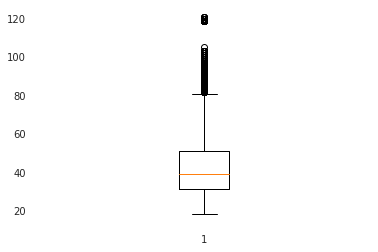

In [10]:
plt.boxplot(x['Edad'])
plt.show()

In [11]:
x.loc[(x.Edad>=18)&(x.Edad<25) ,'Edad']=1 # Si es adulto joven, mayor o igual que 18 y menor que 25 años
x.loc[(x.Edad>=25)&(x.Edad<45) ,'Edad']=2 # Si es adulto, mayor o igual que 25 y menor que 45 años
x.loc[(x.Edad>=45)&(x.Edad<70) ,'Edad']=3 # Si es adulto y adulto mayor, mayor o igual que 45 y menor que 70 años
x.loc[(x.Edad>=70) ,'Edad']=4 # Si es adulto mayor, mayor o igual que 70

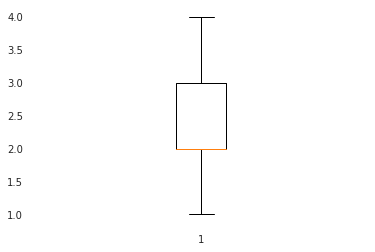

In [12]:
plt.boxplot(x['Edad'])
plt.show()

In [13]:
# General
freq = x['Edad'].value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

2    2234884
3    1307776
1     263717
4     185310
Name: Edad, dtype: int64


In [14]:
# Con respuesta
freq = x[x['RESPONDIDA']==1].Edad.value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

2    55235
3    40887
4     6866
1     4155
Name: Edad, dtype: int64


In [15]:
# Sin respuesta
freq = x[x['RESPONDIDA']==0].Edad.value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

2    2179649
3    1266889
1     259562
4     178444
Name: Edad, dtype: int64


##Segmento

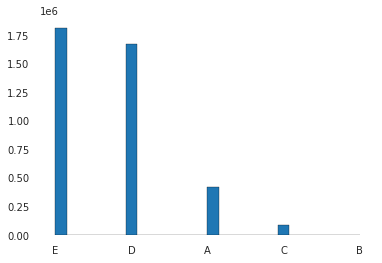

In [16]:
plt.hist(x['Segmento'], bins=26, edgecolor = 'black')
plt.show()

In [17]:
x.loc[(x.Segmento=='E'), 'Segmento'] = 1 # E
x.loc[(x.Segmento=='D'), 'Segmento'] = 2 # D
x.loc[(x.Segmento=='A')|(x.Segmento=='B')|(x.Segmento=='C'), 'Segmento'] = 3 # A, B y C

In [18]:
x.Segmento.unique()

array([1, 2, 3], dtype=object)

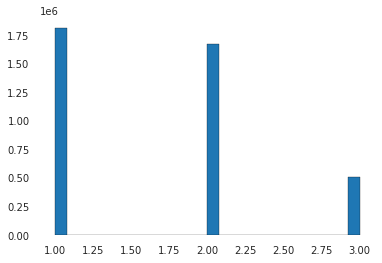

In [19]:
plt.hist(x['Segmento'], bins=26, edgecolor = 'black')
plt.show()

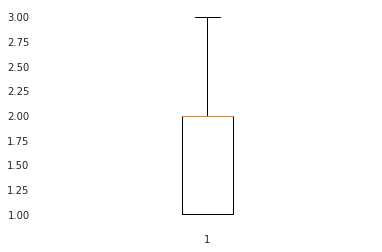

In [20]:
plt.boxplot(x['Segmento'])
plt.show()

##Subsegmento

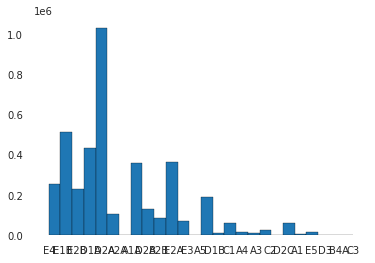

In [21]:
plt.hist(x['SubSegmento'], bins=26, edgecolor = 'black')
plt.show()

In [22]:
x.loc[(x.SubSegmento=='D2A'), 'SubSegmento'] = 1 
x.loc[(x.SubSegmento=='E1B')|(x.SubSegmento=='E2B'), 'SubSegmento'] = 2
x.loc[(x.SubSegmento=='D1A')|(x.SubSegmento=='D3')|(x.SubSegmento=='D1B')|(x.SubSegmento=='D2B')|(x.SubSegmento=='D2C'), 'SubSegmento'] = 3
x.loc[(x.SubSegmento=='E2A')|(x.SubSegmento=='E5')|(x.SubSegmento=='E3')|(x.SubSegmento=='E4'), 'SubSegmento'] = 4
x.loc[(x.SubSegmento=='A1A')|(x.SubSegmento=='A2A')|(x.SubSegmento=='A2B')|(x.SubSegmento=='A4')|(x.SubSegmento=='A3')|(x.SubSegmento=='A1'), 'SubSegmento'] = 5
x.loc[(x.SubSegmento=='C1')|(x.SubSegmento=='C2')|(x.SubSegmento=='C3')|(x.SubSegmento=='B4A')|(x.SubSegmento=='A5'), 'SubSegmento'] = 6

In [23]:
x.SubSegmento.unique()

array([4, 2, 3, 1, 5, 6], dtype=object)

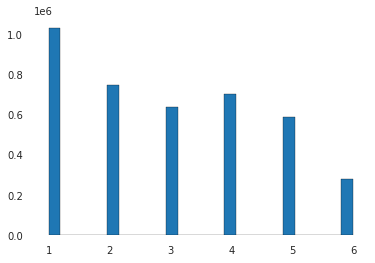

In [24]:
plt.hist(x['SubSegmento'], bins=26, edgecolor = 'black')
plt.show()

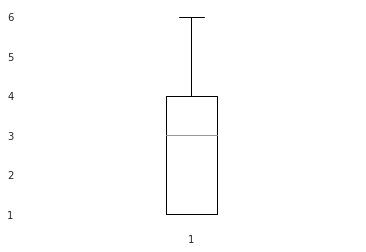

In [25]:
plt.boxplot(x['SubSegmento'])
plt.show()

## Agrupación de segmentos

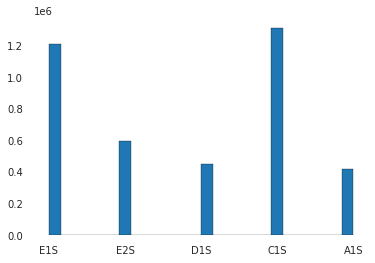

In [26]:
plt.hist(x['Segto_Agrup'], bins=26, edgecolor = 'black')
plt.show()

In [27]:
x.loc[(x.Segto_Agrup=='C1S'), 'Segto_Agrup'] = 1 
x.loc[(x.Segto_Agrup=='E1S'), 'Segto_Agrup'] = 2
x.loc[(x.Segto_Agrup=='E2S')|(x.Segto_Agrup=='D1S')|(x.Segto_Agrup=='A1S'), 'Segto_Agrup'] = 3

In [28]:
x.Segto_Agrup.unique()

array([2, 3, 1], dtype=object)

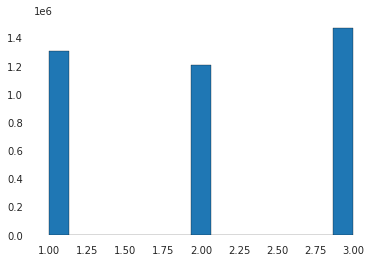

In [29]:
plt.hist(x['Segto_Agrup'], bins=15, edgecolor = 'black')
plt.show()

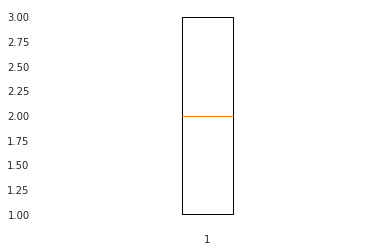

In [30]:
plt.boxplot(x['Segto_Agrup'])
plt.show()

## Apertura

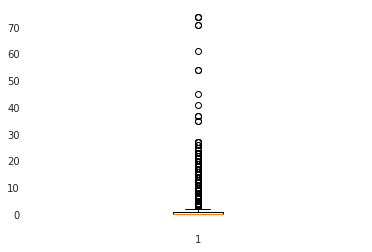

In [31]:
plt.boxplot(x['Apertura'])
plt.show()

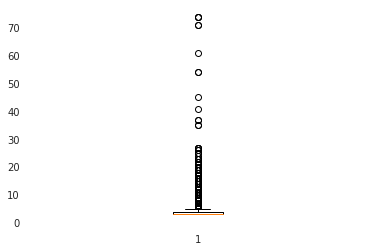

In [32]:
plt.boxplot(x[x['RESPONDIDA'] == 1].Apertura)
plt.show()

In [33]:
x.loc[(x.RESPONDIDA==1)&(x.Apertura>5), 'Apertura'] = 6

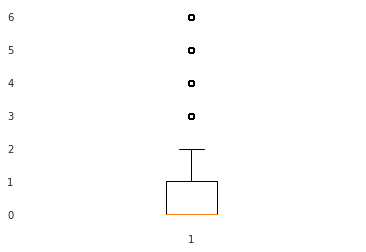

In [34]:
plt.boxplot(x.Apertura)
plt.show()

##RESPONDIDA
Presencia de duplicados tras eliminar Envio Id, E_mail, día de envío y fechas.

In [7]:
freq = x['RESPONDIDA'].value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

0    4486463
1     107143
Name: RESPONDIDA, dtype: int64


In [8]:
sr = x[x['RESPONDIDA']==0].drop_duplicates() 
cr = x[x['RESPONDIDA']==1]
fram = [sr, cr]
x = pd.concat(fram).sort_values(['Mes_envio'])

In [9]:
freq = x['RESPONDIDA'].value_counts() #Cambiar la X en caso de que sea por mes
print(freq) # Dataset construido

0    3884544
1     107143
Name: RESPONDIDA, dtype: int64


#Eliminación de columnas que no serán usados en modelamiento

In [35]:
x = x.drop(['Duracion', 'Duracion_i_f'], axis=1)
x

,Sexo,Edad,Segmento,SubSegmento,Segto_Agrup,Carterizado,Apertura,Hora_envio,Dia_semana,Mes_envio,RESPONDIDA
0,H,1,1,4,2,0,0,9,Domingo,1,0
2460475,M,2,1,2,2,0,0,14,Domingo,1,0
2460481,M,2,1,2,3,0,0,8,Sabado,1,0
2460486,M,2,1,2,3,0,1,18,Jueves,1,0
2460490,M,2,2,3,3,0,0,9,Domingo,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4132277,H,1,1,2,2,0,0,16,Jueves,12,0
2741607,M,2,2,1,1,1,0,12,Miercoles,12,0
1173003,H,2,3,6,3,0,0,16,Sabado,12,0
1635822,H,2,3,5,3,0,1,19,Miercoles,12,0


# Transformación de columnas a tipo entero

In [36]:
x = x.replace({'Dia_semana' : {'Lunes': 1, 'Martes': 2, 'Miercoles': 3, 'Jueves': 4, 'Viernes': 5,'Sabado': 6, 'Domingo': 7}})
x['Dia_semana'] = x['Dia_semana'].astype(int)

In [37]:
x = x.replace({'Sexo' : {'H':0, 'M':1}})
x['Sexo'] = x['Sexo'].astype(int)

In [38]:
#x = x.replace({'Segmento' : {'E':'5', 'A':'1', 'D':'4', 'C':'3', 'B':'2'}})
#x['Segmento'] = pd.factorize(x['Segmento'])[0] + 1
x['Segmento'] = x['Segmento'].astype(int)

In [39]:
#x = x.replace({'SubSegmento' : {'E2B':'28', 'E3':'29', 'A3':'4', 'A1A':'1', 'D1A':'19', 'D2B':'22', 'E2A':'27', 'A2B':'3', 
#                                'A2A':'2', 'E1B':'26', 'E4':'30', 'D2A':'21', 'D2C':'23', 'C2':'17', 'A5':'6', 'C1':'16', 
#                                'A4':'5', 'D1B':'20', 'E5':'31', 'A1':'0', 'D3':'24', 'B4A':'11', 'C3':'18'}})
# x['SubSegmento'] = pd.factorize(x['SubSegmento'])[0] + 1
x['SubSegmento'] = x['SubSegmento'].astype(int)

In [40]:
#x = x.replace({'Segto_Agrup' : {'E2S':'5', 'E1S':'4', 'A1S':'1', 'D1S':'3', 'C1S':'2'}})
# x['Segto_Agrup'] = pd.factorize(x['Segto_Agrup'])[0] + 1
x['Segto_Agrup'] = x['Segto_Agrup'].astype(int)

In [41]:
x['Carterizado'] = x['Carterizado'].astype(int)
x['Apertura'] = x['Apertura'].astype(int)
x['Mes_envio'] = x['Mes_envio'].astype(int)
x['Hora_envio'] = x['Hora_envio'].astype(int)
x['RESPONDIDA'] = x['RESPONDIDA'].astype(int)
x['Edad'] = x['Edad'].astype(int)
x = x.reset_index(drop= True)

In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991687 entries, 0 to 3991686
Data columns (total 11 columns):
 #   Column       Dtype
---  ------       -----
 0   Sexo         int64
 1   Edad         int64
 2   Segmento     int64
 3   SubSegmento  int64
 4   Segto_Agrup  int64
 5   Carterizado  int64
 6   Apertura     int64
 7   Hora_envio   int64
 8   Dia_semana   int64
 9   Mes_envio    int64
 10  RESPONDIDA   int64
dtypes: int64(11)
memory usage: 335.0 MB


#Nueva estadisticas tras eliminar outliers en los cuatro casos anteriores

##Completo

In [44]:
profile_tratado = ProfileReport(x, title="Dataset Tratado N°2 2020 - completo", explorative=True)
profile_tratado.to_file(path + '/Profiling pandas/Outliers tratados/Dataset2_2020_completo_outliers_tratados.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Con respuesta

In [45]:
si_tratado = x[x["RESPONDIDA"]==1]
profile_con_respuesta_tratado = ProfileReport(si_tratado, title="Dataset Tratado N°2 2020 - con respuesta", explorative=True)
profile_con_respuesta_tratado.to_file(path + '/Profiling pandas/Outliers tratados/Dataset2_2020_con_respuesta_outliers_tratados.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Sin respuesta

In [43]:
no_tratado = x[x["RESPONDIDA"]==0]
profile_sin_respuesta_tratado = ProfileReport(no_tratado, title="Dataset Tratado N°2 2020 - sin respuesta", explorative=True)
profile_sin_respuesta_tratado.to_file(path + '/Profiling pandas/Outliers tratados/Dataset2_2020_sin_respuesta_outliers_tratados.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Normalización de datos

In [52]:
x = (x-x.min())/(x.max()-x.min())


In [54]:
x.to_csv(path + "/Dataset_de_prueba_oficial_2.csv", sep= ';', index = False)

In [53]:
x

,Sexo,Edad,Segmento,SubSegmento,Segto_Agrup,Carterizado,Apertura,Hora_envio,Dia_semana,Mes_envio,RESPONDIDA
0,0.0,0.000000,0.0,0.6,0.5,0.0,0.000000,0.076923,1.000000,0.0,0.0
1,1.0,0.333333,0.0,0.2,0.5,0.0,0.166667,0.384615,1.000000,0.0,0.0
2,1.0,0.333333,1.0,1.0,1.0,0.0,0.000000,0.307692,1.000000,0.0,0.0
3,0.0,0.666667,0.5,0.4,0.0,0.0,0.000000,0.230769,1.000000,0.0,0.0
4,1.0,0.666667,0.5,0.4,1.0,0.0,0.000000,0.846154,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2499064,0.0,1.000000,0.5,0.0,0.0,1.0,0.166667,0.692308,0.166667,1.0,0.0
2499065,0.0,0.666667,0.5,0.0,0.0,1.0,0.666667,0.384615,0.333333,1.0,0.0
2499066,1.0,0.333333,0.0,0.8,0.5,0.0,0.166667,0.846154,0.333333,1.0,0.0
2499067,1.0,0.333333,0.0,0.2,0.5,1.0,0.000000,0.230769,0.000000,1.0,0.0
